## 1. Introduction

In this part of the project, we will clusterize data obtained from the previous notebook. The `set_option` is defined to show all columns and all the importations are made before the start.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('max_columns', None)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing

In [2]:
df = pd.read_csv('para_cluster.csv')
df = df.drop(['Unnamed: 0'],axis=1)
df.columns

Index(['Abastecimento de Água - Nível de Atendimento - Censo Demográfico (Em %)',
       'Coleta de Lixo - Nível de Atendimento - Censo Demográfico (Em %)',
       'Esgoto Sanitário - Nível de Atendimento - Censo Demográfico (Em %)',
       'Consumo de Energia Elétrica - Total (Em MWh)',
       'Consumo de Energia Elétrica - Industrial (Em MWh)',
       'Consumo de Energia Elétrica -  Comércio e Serviços (Em MWh)',
       'Consumo de Energia Elétrica - Rural (Em MWh)',
       'Consumo de Energia Elétrica - Residencial (Em MWh)',
       'Consumo de Energia Elétrica - Iluminação e Serviços Públicos e Outros (Em MWh)',
       'Taxa Geométrica de Crescimento Anual da População - 2010/2020 (Em % a.a.)',
       'Empregos Formais de Homens ', 'Empregos Formais de Mulheres ',
       'Empregos Formais das Pessoas de até 24 Anos ',
       'Empregos Formais das Pessoas de 25 a 39 Anos ',
       'Empregos Formais das Pessoas de 40 a 59 Anos ',
       'Empregos Formais das Pessoas de 60 Anos e Mais

In [3]:
df.shape

(622, 97)

To avoid collinearity, variables with correlation higher than 0.9 will be dropped. In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. In this situation, the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data.

In [307]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] >0.90)]
#to_drop

In [308]:
df = df.drop(['Consumo de Energia Elétrica -  Comércio e Serviços (Em MWh)',
 'Consumo de Energia Elétrica - Residencial (Em MWh)',
 'Consumo de Energia Elétrica - Iluminação e Serviços Públicos e Outros (Em MWh)',
 'Empregos Formais de Homens ',
 'Empregos Formais de Mulheres ',
 'Empregos Formais das Pessoas de até 24 Anos ',
 'Empregos Formais das Pessoas de 25 a 39 Anos ',
 'Empregos Formais das Pessoas de 40 a 59 Anos ',
 'Empregos Formais das Pessoas de 60 Anos e Mais ',
 'Empregos Formais das Pessoas com Ensino Fundamental Incompleto ',
 'Empregos Formais das Pessoas com Ensino Fundamental Completo ',
 'Empregos Formais das Pessoas com Ensino Médio Completo ',
 'Empregos Formais das Pessoas com Ensino Superior Completo ',
 'Empregos Formais da Indústria ',
 'Empregos Formais da Construção ',
 'Empregos Formais do Comércio Atacadista e Varejista e do Comércio e Reparação de Veículos Automotores e Motocicletas ',
 'Empregos Formais dos Serviços ',
 'Participação dos Empregos Formais dos Serviços no Total de Empregos Formais (Em %)',
 'Frota de Veículos - Total ',
 'Frota de Automóveis ',
 'Frota de Ônibus ',
 'Frota de Caminhões ',
 'Frota de Reboques ',
 'Frota de Motocicletas e Assemelhados ',
 'Frota de Microônibus e Camionetas ',
 'Frota de Veículos de Outro Tipo ',
 'Índice de Desenvolvimento Humano Municipal - IDHM - Ranking dos Municípios ',
 'Índice de Desenvolvimento Humano Municipal - IDHM Educação ',
 'Índice de Desenvolvimento Humano Municipal - IDHM Renda ',
 'Leitos de Internação ',
 'Leitos SUS ',
 'Leitos SUS (Coeficiente por mil habitantes)',
 'Taxa de Fecundidade Geral (Por mil mulheres entre 15 e 49 anos)',
 'Óbitos Gerais (por local de residência) ',
 'Óbitos da População de 15 a 34 Anos ',
 'Óbitos da População de 60 Anos e Mais ',
 'PIB (Em mil reais correntes)',
 'População ',
 'População Masculina ',
 'População Feminina ',
 'População de 0 a 3 Anos ',
 'População de 4 a 6 Anos ',
 'População de 6 Anos ',
 'População de 7 a 10 Anos ',
 'População de 11 a 14 Anos ',
 'População de 15 a 17 Anos ',
 'População de 18 a 19 Anos ',
 'Auxiliares de Enfermagem Registrados no COREN/SP ',
 'Dentistas Registrados no CRO/SP ',
 'Enfermeiros Registrados no COREN/SP ',
 'Fonoaudiólogos registrados no CRFa/SP ',
 'Médicos Registrados no CRM/SP ','Empregos Formais da Agricultura. Pecuária. Produção Florestal. Pesca e Aquicultura ',
             'Índice de Desenvolvimento Humano Municipal - IDHM Longevidade ',
       'Índice Paulista de Responsabilidade Social - IPRS - Dimensão Riqueza ',
       'Índice Paulista de Responsabilidade Social - IPRS - Dimensão Longevidade ',
       'Índice Paulista de Responsabilidade Social - IPRS - Dimensão Escolaridade ',
             'Taxa Geométrica de Crescimento Anual da População - 2010/2020 (Em % a.a.)',
             'Dentistas Registrados no CRO/SP (Coeficiente por dois mil habitantes)',
             'Técnicos de Prótese Dentária Registrados no CRO/SP (Coeficiente por dois mil habitantes)',
             'Fonoaudiólogos registrados no CRFa/SP (Coeficiente por mil habitantes)','Area',
              'Técnicos de Enfermagem Registrados no COREN/SP ',
 'Técnicos de Prótese Dentária Registrados no CRO/SP ',
 'Domicílios Particulares com Renda per Capita até 1/2 Salário Mínimo - Censo Demográfico (Em %)',
 'Domicílios Particulares com Renda per Capita até 1/4 do Salário Mínimo - Censo Demográfico (Em %)',
             'Consumo de Energia Elétrica - Total (Em MWh)'],axis=1)
df.shape

(622, 30)

In [309]:
df.head()

,Abastecimento de Água - Nível de Atendimento - Censo Demográfico (Em %),Coleta de Lixo - Nível de Atendimento - Censo Demográfico (Em %),Esgoto Sanitário - Nível de Atendimento - Censo Demográfico (Em %),Consumo de Energia Elétrica - Industrial (Em MWh),Consumo de Energia Elétrica - Rural (Em MWh),Participação dos Empregos Formais da Agricultura. Pecuária. Produção Florestal. Pesca e Aquicultura no Total de Empregos Formais (Em %),Participação dos Empregos Formais da Indústria no Total de Empregos Formais (Em %),Participação dos Empregos Formais da Construção no Total de Empregos Formais (Em %),Participação dos Empregos Formais do Comércio Atacadista e Varejista e do Comércio e Reparação de Veículos Automotores e Motocicletas no Total de Empregos Formais (Em %),Número de Habitantes por Total de Veículos,Número de Habitantes por Automóvel,Índice de Desenvolvimento Humano Municipal - IDHM,Leitos de Internação (Coeficiente por mil habitantes),Taxa de Natalidade (Por mil habitantes),Índice de Envelhecimento (Em %),Taxa de Mortalidade Geral (por local de residência) (Por mil habitantes),Taxa de Mortalidade da População de 15 a 34 Anos (Por cem mil habitantes nessa faixa etária),Taxa de Mortalidade da População de 60 Anos e Mais (Por cem mil habitantes nessa faixa etária),PIB per Capita (Em reais correntes),Participação no PIB do Estado (Em %),Razão de Sexos,População Urbana,População Rural,Grau de Urbanização (Em %),Auxiliares de Enfermagem Registrados no COREN/SP (Coeficiente por mil habitantes),Enfermeiros Registrados no COREN/SP (Coeficiente por mil habitantes),Médicos Registrados no CRM/SP (Coeficiente por mil habitantes),Técnicos de Enfermagem Registrados no COREN/SP (Coeficiente por mil habitantes),Renda per Capita - Censo Demográfico (Em reais correntes),densidade
0,99.76,99.89,99.03,8108,2901,6.63,17.78,3.47,27.69,1.26,2.28,0.790,6.93,11.21,133.52,8.88,83.27,3594.17,31121.18,0.049746,92.93,32668,1226,96.38,4.96,4.72,2.77,1.83,778.44,82.269586
1,96.76,99.72,95.93,74,6470,37.24,5.04,2.46,7.73,1.44,2.50,0.730,0.00,13.26,129.09,9.22,200.40,4084.51,28667.61,0.004705,98.10,3189,258,92.52,3.47,2.02,0.00,8.10,588.02,16.332236
2,99.29,99.66,98.87,33297,14278,19.23,32.33,1.76,19.54,1.65,3.14,0.715,0.00,13.06,69.33,7.16,112.23,4072.03,27263.25,0.044470,100.96,32833,2775,92.21,1.13,1.25,0.88,3.66,540.88,75.034664
3,95.84,99.38,87.99,1929,1717,20.96,17.19,3.05,16.68,1.66,2.75,0.781,0.00,11.73,137.45,11.21,0.00,4004.85,19869.91,0.007254,96.55,7188,609,92.19,3.21,1.29,0.90,3.73,726.28,54.649443
4,93.54,98.74,90.33,4399,1505,1.19,17.39,0.76,17.92,1.38,2.41,0.745,2.30,10.57,90.63,9.69,113.19,4449.42,26192.48,0.022312,94.85,18209,165,99.10,0.77,1.53,1.86,3.56,680.22,305.591591


New data from `municipio.csv` and `covid.csv` are stored into the notebook's memory.

In [310]:
municipios = pd.read_csv('municipio.csv')
municipios = municipios.drop(['Unnamed: 0'],axis=1)
municipios.head()

,Município,Cód. IBGE
0,Adamantina,3500105
1,Adolfo,3500204
2,Aguaí,3500303
3,Águas da Prata,3500402
4,Águas de Lindóia,3500501


In [311]:
covid = pd.read_csv("DATA/covid.csv", sep=";", encoding='latin-1')
covid = covid.drop(['Unnamed: 5', 'Unnamed: 6'], axis=1)
covid.rename(columns={'Cod_IBGE':'Cód. IBGE'}, 
                 inplace=True)
covid.rename(columns={'Município':'Localidades'}, 
                 inplace=True)
covid.head()

,Cód. IBGE,Grande região,Localidades,Mun_Total de casos,Mun_Total de óbitos
0,3500105,Interior,Adamantina,58,5
1,3500204,Interior,Adolfo,24,2
2,3500303,Interior,Aguaí,79,4
3,3500402,Interior,Águas da Prata,2,1
4,3500501,Interior,Águas de Lindóia,43,4


## 2. Data Scaling

As we have many variables with different ranges and meaning, scaler and/or normalization is necessary. Several scaler can be used. Indeed many estimators are designed with the assumption that each feature takes values close to zero or more importantly that all features vary on comparable scales. The Normalizer rescales the vector for each sample to have unit norm, independently of the distribution of the samples. 

In [312]:
#scaler = preprocessing.RobustScaler()
#scaler = preprocessing.MinMaxScaler()
#scaler = preprocessing.StandardScaler()


df_scaled = Normalizer().fit_transform(df)
#df_scaled =  PowerTransformer(method='yeo-johnson').fit_transform(df)
names = df.columns
df_scaled = pd.DataFrame(df_scaled, columns=names)

In [313]:
ssd = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_scaled)
    ssd.append(km.inertia_)

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use. In this case, we have used 15 clusters.

Text(0.5,1,'Elbow Method For Optimal k')

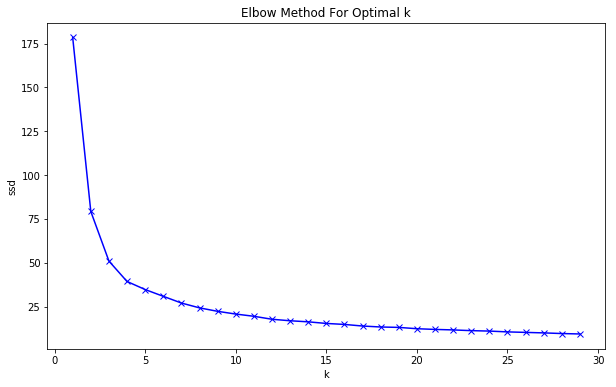

In [314]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('ssd')
plt.title('Elbow Method For Optimal k')
#plt.show()

In [315]:
kmeans = KMeans(n_clusters=15)
model = kmeans.fit(df_scaled)

In [316]:
pred = model.labels_
df['cluster'] = pred

In [317]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_model = pca.fit_transform(df_scaled)
data_transform = pd.DataFrame(data = pca_model, columns = ['PCA1', 'PCA2'])
data_transform['cluster'] = pred

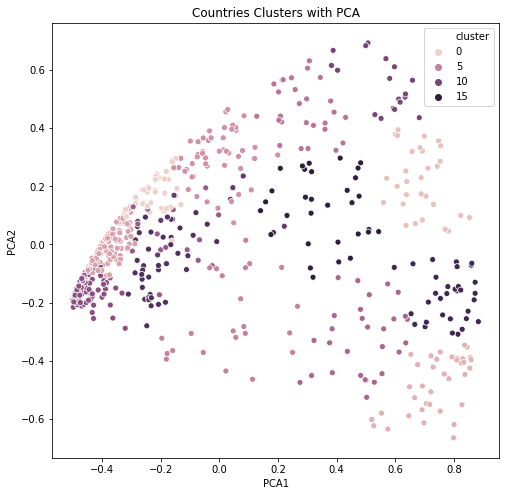

In [318]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
g = sns.scatterplot(data=data_transform, x='PCA1', y='PCA2',  hue='cluster')
title = plt.title('Countries Clusters with PCA')

In [319]:
df_total = pd.concat([municipios, df], axis=1)

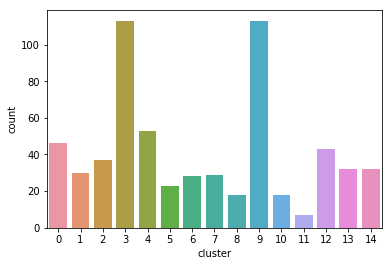

In [320]:
sns.countplot(df_total['cluster'])

In [321]:
df_total = df_total.rename(columns={'Município': 'Localidades'})
df_total = df_total.merge(covid,on='Localidades', how='left' )

Saving the dataframe for maping tools.

In [322]:
df_total.to_csv('clusterizacao_para_mapa.csv')

### 3. Visualization

In [323]:
df_ead = df_total

In [324]:
df_ead = df_ead.drop(['Cód. IBGE_x','Cód. IBGE_y', 'Grande região',
       'Mun_Total de casos', 'Mun_Total de óbitos'],axis=1)

> Those are the variables that we have used in k-means. To choose which you would like to plot, go to the following cell and type the name of the variable. In this example case, we have chosen 'Índice de Desenvolvimento Humano Municipal - IDHM'. After that, you can run the last cell. A new page is going to pop up.

In [327]:
df_ead.columns

Index(['Localidades',
       'Abastecimento de Água - Nível de Atendimento - Censo Demográfico (Em %)',
       'Coleta de Lixo - Nível de Atendimento - Censo Demográfico (Em %)',
       'Esgoto Sanitário - Nível de Atendimento - Censo Demográfico (Em %)',
       'Consumo de Energia Elétrica - Industrial (Em MWh)',
       'Consumo de Energia Elétrica - Rural (Em MWh)',
       'Participação dos Empregos Formais da Agricultura. Pecuária. Produção Florestal. Pesca e Aquicultura no Total de Empregos Formais (Em %)',
       'Participação dos Empregos Formais da Indústria no Total de Empregos Formais (Em %)',
       'Participação dos Empregos Formais da Construção no Total de Empregos Formais (Em %)',
       'Participação dos Empregos Formais do Comércio Atacadista e Varejista e do Comércio e Reparação de Veículos Automotores e Motocicletas no Total de Empregos Formais (Em %)',
       'Número de Habitantes por Total de Veículos ',
       'Número de Habitantes por Automóvel ',
       'Índice d

In [328]:
col = 'Índice de Desenvolvimento Humano Municipal - IDHM '

In [329]:
#grid = sns.pairplot(df_ead5, hue="cluster", diag_kws={'bw': 0.4})
#dfl = df_ead4.set_index('cluster').stack().reset_index().rename(columns={'level_1': 'groups', 0: 'values'})
import plotly.express as px
from plotly.offline import plot

fig = px.box(df_ead, x="cluster", y=col)
plot(fig)

'temp-plot.html'